In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/popular-movies-top-250-movies-imdb/PopularMovies.csv


## Checking the dataset

In [50]:
data = pd.read_csv("/kaggle/input/popular-movies-top-250-movies-imdb/PopularMovies.csv")

In [51]:
data.head()

,Unnamed: 0,Movie_Names,Ratings,Released_Year,Movie_Link,Votes,Metascore,Userreviews,Criticreviews
0,0,The Shawshank Redemption,9.2,1994,https://www.imdb.com/title/tt0111161/?pf_rd_m=...,"<div class=""sc-bde20123-3 bjjENQ"">2.8M</div>",82,10.9K,173
1,1,The Godfather,9.2,1972,https://www.imdb.com/title/tt0068646/?pf_rd_m=...,"<div class=""sc-bde20123-3 bjjENQ"">1.9M</div>",100,5.4K,203
2,2,The Dark Knight,9.0,2008,https://www.imdb.com/title/tt0468569/?pf_rd_m=...,"<div class=""sc-bde20123-3 bjjENQ"">2.7M</div>",84,8.5K,448
3,3,The Godfather Part II,9.0,1974,https://www.imdb.com/title/tt0071562/?pf_rd_m=...,"<div class=""sc-bde20123-3 bjjENQ"">1.3M</div>",90,1.3K,136
4,4,12 Angry Men,9.0,1957,https://www.imdb.com/title/tt0050083/?pf_rd_m=...,"<div class=""sc-bde20123-3 bjjENQ"">815K</div>",97,2K,165


In [52]:
data.isnull().sum()

Unnamed: 0       0
Movie_Names      0
Ratings          0
Released_Year    0
Movie_Link       0
Votes            0
Metascore        0
Userreviews      0
Criticreviews    0
dtype: int64

In [53]:
data.duplicated().sum()

0

In [54]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0               Movie_Names  Ratings  Released_Year  \
0             0  The Shawshank Redemption      9.2           1994   
1             1             The Godfather      9.2           1972   
2             2           The Dark Knight      9.0           2008   
3             3     The Godfather Part II      9.0           1974   
4             4              12 Angry Men      9.0           1957   
..          ...                       ...      ...            ...   
245         245                  The Help      8.0           2011   
246         246             Life of Brian      8.0           1979   
247         247            The Iron Giant      8.0           1999   
248         248                   Aladdin      8.0           1992   
249         249        Dances with Wolves      8.0           1990   

                                            Movie_Link  \
0    https://www.imdb.com/title/tt0111161/?pf_rd_m=...   
1    https://www.imdb

In [55]:
data.dtypes

Unnamed: 0         int64
Movie_Names       object
Ratings          float64
Released_Year      int64
Movie_Link        object
Votes             object
Metascore          int64
Userreviews       object
Criticreviews      int64
dtype: object

## Picking the columns for the use in kmeans 

In [56]:
x = data[['Criticreviews', 'Ratings']]
data['Criticreviews'] = pd.to_numeric(data['Criticreviews'], errors='coerce')
data['Ratings'] = pd.to_numeric(data['Ratings'], errors='coerce')

In [64]:
cluster_list=[]
inertia_values = []

## Clustering 

In [67]:
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42 , n_init='auto')  
    kmeans.fit(x)  
    # Append the number of clusters and the corresponding inertia value
    cluster_list.append(i)
    inertia_values.append(kmeans.inertia_)  

### Plotting graph for above

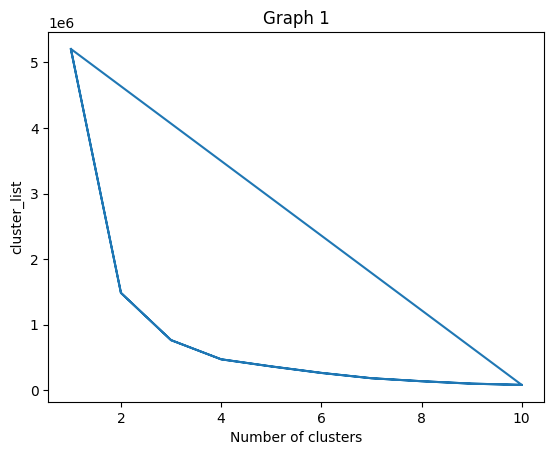

In [69]:
plt.plot(cluster_list, inertia_values) 
plt.title('Graph 1')  
plt.xlabel('Number of clusters')  
plt.ylabel('cluster_list')  
plt.show()  

## Training

In [70]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42, n_init='auto')  
y_predict= kmeans.fit_predict(x)  

In [72]:
y_predict

array([0, 3, 1, 0, 0, 0, 2, 3, 3, 0, 3, 0, 2, 2, 1, 3, 3, 0, 0, 0, 3, 0,
       3, 0, 3, 4, 0, 3, 0, 3, 3, 3, 0, 3, 4, 0, 3, 3, 0, 3, 4, 2, 0, 3,
       0, 0, 2, 0, 0, 0, 0, 3, 0, 3, 3, 4, 3, 3, 3, 3, 0, 1, 2, 0, 0, 2,
       3, 3, 4, 3, 2, 2, 2, 0, 0, 0, 0, 4, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       1, 0, 0, 3, 3, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       2, 0, 0, 2, 3, 0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 2, 0, 2, 0, 3, 2, 2,
       0, 2, 0, 0, 3, 0, 2, 1, 0, 1, 3, 3, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 3, 0, 0, 4, 0, 3, 3, 3, 4, 1, 0, 0, 3, 2, 2, 3, 0, 3,
       0, 0, 3, 0, 1, 1, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 2,
       0, 4, 0, 0, 3, 3, 0, 3, 1, 3, 0, 2, 0, 0, 0, 3, 0, 1, 4, 3, 0, 2,
       0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0], dtype=int32)

## Plotting graph

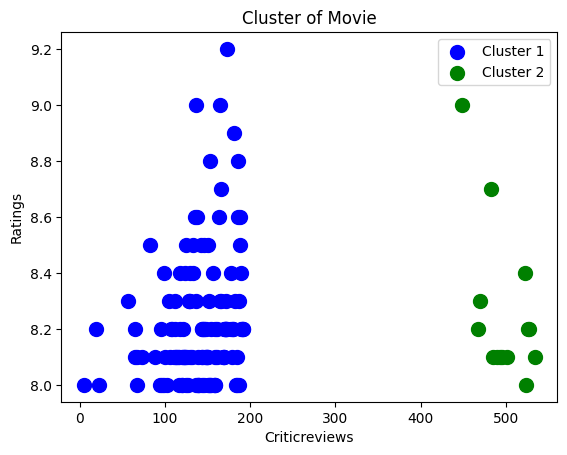

In [75]:
x_array = x.to_numpy()
plt.scatter(x_array[y_predict == 0, 0], x_array[y_predict == 0, 1], s=100, c='blue', label='Cluster 1') 
plt.scatter(x_array[y_predict == 1, 0], x_array[y_predict == 1, 1], s=100, c='green', label='Cluster 2')
plt.title('Cluster of Movie')
plt.xlabel('Criticreviews')
plt.ylabel('Ratings')
plt.legend()
plt.show()

# Overview for the code

### The above notebook consist of K-Means clustering using elbow method for finding the number of cluster which uses WCSS value. For working on the dataset I used two columns rating and crictviews and converting them to numeric datatypes for easy workflow. I used "n_init = 'auto' " here since the number of times KMeans algorithm will run with the different centroid seeds depend on this. 
### Directly using x for the graph purpose without converting it to array causes error since it is a dataframe hence I converted it to array. 